In [19]:
%matplotlib inline
import gc
import math
import pandas as pd
import numpy as np
import time, multiprocessing
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import seaborn as sns
from pathlib import Path

from scipy import stats

gc.enable()

import warnings
warnings.simplefilter('ignore')

In [20]:
DATA_PATH = Path('/mnt/c/Users/Ronan Perry/Downloads/')

In [20]:
types = ['Axial', 'Coronal', 'Sagittal']
files = [DATA_PATH / f'mf_23-09-2019-08_29_slice_{t.lower()}_smri_ageXsex.p.csv' for t in types]
titles = [f'{t} Slice Classification' for t in types]

In [21]:
names = {"RF":"#fb9a99", 
        "SPORF":"#4daf4a", 
        "MORF":"#e31a1c"}

NameError: name 'files' is not defined

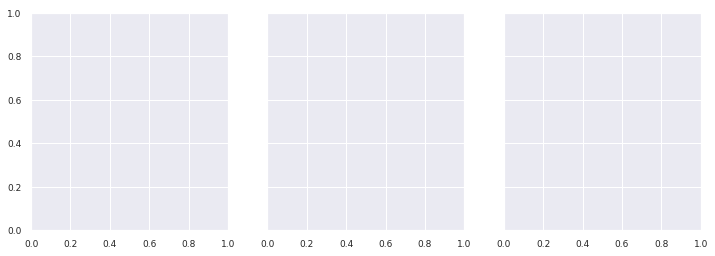

In [18]:
fig, axes = plt.subplots(1,3, figsize = (12,4), sharey=True)

for ax, idx in zip(axes,[0,1,2]):
    dat = pd.read_csv(files[idx])

    #d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'color'])
    d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'se', 'color'])

    k = 0
    for ni in np.unique(dat['n']):
        for cl in np.unique(dat['classifier']):
            if not cl in names.keys():
                continue

            tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][['n', 'Lhat']]

            se = stats.sem(tmp['Lhat'])

            list(tmp.mean())
            d1.loc[k] = [cl] + list(tmp.mean()) + [se] + [names[cl]]
            #d1.loc[k] = [cl] + list(tmp.mean()) + [names[cl]]
            k += 1

    ## Plot
    fontsize = 11
    sns.set(); sns.set(style="darkgrid", rc={'font.size':fontsize, 
                                             'legend.fontsize': fontsize-2,
                                             'xtick.labelsize': fontsize-2,
                                             'ytick.labelsize': fontsize-2,
                                             'axes.labelsize': fontsize})        
    matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']       

    for key in names.keys():
        grp = d1[d1['classifier'] == key] 
        ax = grp.plot(ax=ax, kind='line', x='n', y='Lhat', label=key, \
                c = names[key], alpha =0.65, yerr='se')
        ax.set_xscale('log')
        ax.set_title(titles[idx])
        ax.get_legend().remove()
        ax.set_xlabel('')

lgd = ax.legend(title='Algorithm', loc='upper left',bbox_to_anchor = (1.04,1), borderaxespad=0, frameon=False)
#plt.title(titles[idx])
ax = fig.add_subplot(111,frameon=False)    # The big subplot
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
ax.set_ylabel('Mean test error')
ax.set_xlabel('Number of training samples')
#plt.ylim()
plt.tight_layout()
#plt.savefig(DATA_PATH / f'morf_{titles[idx]}.pdf',format='pdf')
plt.savefig(DATA_PATH / f'morf_biobank_3plot.pdf',format='pdf')
plt.show()

## Single Plot

In [92]:
names = {"Log. Reg": "#999999", 
         "Lin. SVM":"#f781bf", 
         "SVM":"#a65628", 
         "kNN": "#ffff33", 
         "RF":"#ff7f00", 
         "MLP":"#984ea3", 
         "SPORF":"#4daf4a",
         "CNN":"#377eb8",
         "MORF":"#e41a1c"}

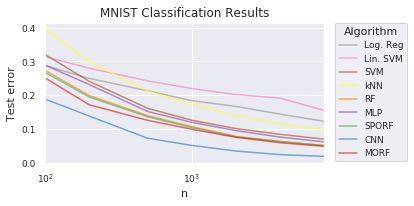

In [106]:
d1 = pd.read_csv(DATA_PATH / f'mf_v1_mnist.csv')
d2 = pd.read_csv(DATA_PATH / f'mf_all_mnist.csv')
d3 = pd.read_csv(DATA_PATH / f'mnist_cnn_results_5runs.csv')

#dat = d1
dat = pd.concat((d1,d2,d3))

d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'color'])
#d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'se', 'color'])

k = 0
for ni in np.unique(dat['n']):
    for cl in np.unique(dat['classifier']):
        if not cl in names.keys():
            continue

        tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][['n', 'Lhat']]

        se = stats.sem(tmp['Lhat'])
        
        list(tmp.mean())
        #d1.loc[k] = [cl] + list(tmp.mean()) + [se] + [names[cl]]
        d1.loc[k] = [cl] + list(tmp.mean()) + [names[cl]]
        k += 1

## Plot
fontsize = 11
sns.set(); sns.set(style="darkgrid", rc={'font.size':fontsize, 
                                         'legend.fontsize': fontsize-2,
                                         'xtick.labelsize': fontsize-2,
                                         'ytick.labelsize': fontsize-2,
                                         'axes.labelsize': fontsize})        
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']       
fig, ax = plt.subplots(figsize = (6,3))

for key in names.keys():
    grp = d1[d1['classifier'] == key] 
    ax = grp.plot(ax=ax, kind='line', x='n', y='Lhat', label=key, \
            c = names[key], alpha =0.65)
    ax.set_xscale('log')

lgd = ax.legend(title='Algorithm', loc='upper left',bbox_to_anchor = (1.04,1), borderaxespad=0, frameon=True)
plt.title('MNIST Classification Results')
plt.ylabel('Test error')
plt.xlabel('n')
plt.xticks([100,1000,8000])
plt.tight_layout()
plt.savefig(DATA_PATH / f's-rerf_mnist_experiment.pdf',format='pdf')
plt.show()